In [153]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [154]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
from tqdm import tqdm

In [155]:
data = pd.read_table('ratings.txt')

In [156]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [157]:
data['document'].nunique()

194543

In [158]:
#중복값 제거
data.drop_duplicates(subset=['document'], inplace=True)

In [159]:
len(data)

194544

In [160]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


<AxesSubplot:>

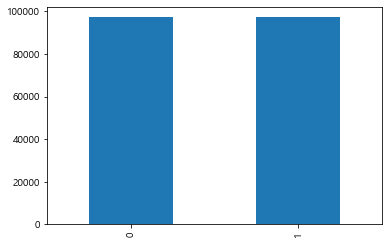

In [161]:
data['label'].value_counts().plot(kind='bar')

In [162]:
data.groupby('label').size().reset_index(name='count')

,label,count
0,0,97277
1,1,97267


In [163]:
data.isnull().values.any()

True

In [164]:
#null값 확인
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [165]:
data.loc[data.document.isnull()]

,id,document,label
46471,6369843,NaN,1


In [166]:
#null값을 가진 행 삭제
data.dropna(inplace=True)

In [167]:
#다시 null값 확인
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [168]:
len(data)

194543

In [169]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [170]:
#series형태이기 때문에 str.replace()
#^: ~을 제외하고
data['document']=data['document'].str.replace('[^ㄱ-하-ㅣ가힣]',' ')

C:\Users\user\AppData\Local\Temp\ipykernel_14928\3195816754.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document']=data['document'].str.replace('[^ㄱ-하-ㅣ가힣]',' ')


In [171]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 생으로 외국디자이너와 그들이 일군 전통을 통 발전 가는 문 산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루 거라고 생각 는데 몰입 서 봤다 그래 이런...,1
4,10067386,안개 자욱 밤하늘에 떠 있는 초승달 같은 영,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰 레 기,0
199997,5458175,완전 사이코영 마지막은 더욱더 이 영 의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [172]:
#False: 공백 값이 없다.
data.isnull().values.any()

False

In [173]:
data['document'].replace('', np.nan, inplace=True)

In [174]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.document, data.label, random_state=1234)

In [176]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다']

In [177]:
okt = Okt()

In [178]:
#                                              어간 추출
okt.morphs('오늘 날시가 추워서 기분이 좋지않다', stem=True)

['오늘', '날다', '춥다', '기분', '이', '좋다', '않다']

In [179]:
x_train = x_train[:10000]
x_test = x_test[:10000]
y_train = y_train[:10000]
y_test = y_test[:10000]

In [180]:
train_x=[]
for s in tqdm(x_train):
    temp_x =[]
    temp_x=okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    train_x.append(temp_x)

100%|██████████| 10000/10000 [00:15<00:00, 660.36it/s]


In [181]:
test_x=[]
for s in tqdm(x_test):
    temp_x =[]
    temp_x=okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    test_x.append(temp_x)

100%|██████████| 10000/10000 [00:16<00:00, 605.40it/s]


In [182]:
train_x[:3]

[['영', '자체', '재앙', '이다', 'ㅠㅠ'],
 ['정준영', '일박이일', '살리다', 'ㅋ'],
 ['양키',
  '놈',
  '도대체',
  '왜',
  '살인마',
  '열광하다',
  '이건',
  '뭐',
  '재미',
  '없다',
  '긴장도',
  '안되다',
  '졸라',
  '뻔',
  '서다',
  '숨',
  '만',
  '나오다']]

In [183]:
test_x[:3]

[['내', '본영', '중', '에서', '젤', '최악', '이다', '게영'],
 ['굿', '개잼', '꿀잼', '잼', '무', '추천'],
 ['인류', '멸망', '이라', '쓰다', '일', '본', '감염', '이라', '읽다', 'ㅁㅊ']]

##### Word2Vec

In [184]:
from gensim.models import Word2Vec

In [187]:
#                       300차원으로 변환?
#                                        앞뒤로 단어3개
#                                                  단어가 최소 3번은 나와야 함
w2v = Word2Vec(train_x, vector_size=300, window=3, min_count=3)

In [188]:
word_vectors = w2v.wv

In [190]:
vocabs = word_vectors.key_to_index.keys()

In [191]:
word_vectors_list=[word_vectors[v] for v in vocabs]

In [192]:
print(word_vectors_list[:1])

[array([-6.66614668e-03,  2.73852855e-01,  1.26310401e-02,  1.29312068e-01,
        5.19258343e-03, -3.01204115e-01,  2.28358433e-01,  5.60363173e-01,
        2.86660604e-02, -1.33776098e-01,  1.27657913e-02, -1.86158314e-01,
       -5.64528350e-03,  3.46946786e-03, -1.95204735e-01, -1.94298074e-01,
        2.70772845e-01, -1.59063027e-04, -9.77161713e-03, -4.24014293e-02,
       -8.37265328e-02,  7.08232820e-03,  1.91985443e-01,  1.00076590e-02,
        1.48149624e-01, -2.68096961e-02, -2.77993232e-01,  6.78282380e-02,
       -1.30078077e-01, -2.68828958e-01,  6.87710568e-02, -5.17414771e-02,
        9.72503610e-03, -1.12720402e-02, -6.35887012e-02,  9.44228023e-02,
        6.05622754e-02, -2.60316849e-01, -8.21253210e-02, -2.11280547e-02,
       -1.19414605e-01, -3.82372440e-04,  5.72155975e-02, -1.53138444e-01,
        1.34512961e-01,  2.17305109e-01,  5.40259778e-02,  8.92925709e-02,
       -9.39847305e-02,  2.40688056e-01, -1.39414547e-02,  8.24328363e-02,
       -1.79600075e-01, 

In [195]:
#print(w2v['관객'])
#유사한 단어 뽑아
#w2v.wv.most_similar(positive='관객')
w2v.wv.most_similar('관객')

[('인가', 0.9997211694717407),
 ('조', 0.9997197985649109),
 ('라', 0.9997181296348572),
 ('살다', 0.9997138977050781),
 ('실', 0.9997132420539856),
 ('치다', 0.9997122883796692),
 ('일본', 0.9997122883796692),
 ('되어다', 0.9997105002403259),
 ('수준', 0.9997092485427856),
 ('니', 0.9997087121009827)]

In [196]:
#학습된 모델 저장
w2v.save('w2v.bin')

In [197]:
#저장된 모델 불러오기
saved_w2v = Word2Vec.load('w2v.bin')
print(saved_w2v)

Word2Vec(vocab=2614, vector_size=300, alpha=0.025)
